# Análise de Acoes Empresas de Jogos Eletrônicos

## Conclusões Obtidas

### Análise de Dados  
- A **Nintendo** apresentou menor volatilidade diária e retornos mais consistentes ao longo do tempo, indicando um perfil de investimento mais conservador.  
- A **Sony** destacou-se pelo alto volume médio negociado, o que reflete maior liquidez e interesse do mercado.  
- A **Activision Blizzard** mostrou altos níveis de volatilidade, com grandes variações nos preços ajustados, sugerindo maior risco e potencial de retorno.  
- A clusterização com K-Means separou empresas em três grupos:  
  - **Grupo 1**: Incluiu empresas como **Nintendo**, caracterizadas por menor risco e maior estabilidade.  
  - **Grupo 2**: Representado por empresas como **Activision Blizzard**, englobou alta volatilidade e potencial de retornos expressivos.  
  - **Grupo 3**: Contém empresas como **Electronic Arts (EA)**, com características intermediárias, incluindo volatilidade moderada e volumes negociados consistentes.

### Desempenho do Modelo  
- O modelo K-Means classificou as empresas em três clusters com base nas variáveis "Preço Ajustado", "Volume" e "Volatilidade Diária".  
- O número ideal de clusters foi validado pela análise de inércia, indicando boa separação entre os grupos.  
- A visualização dos clusters mostrou clara distinção entre empresas de alta, média e baixa volatilidade, com Nintendo, Activision Blizzard e Sony representando exemplos extremos de cada cluster.

### Insights Estratégicos  
- **Perfis Conservadores**: Investidores podem considerar empresas como **Nintendo**, devido à sua estabilidade e menor volatilidade.  
- **Perfis Moderados**: **Sony** oferece uma combinação de liquidez e desempenho consistente.  
- **Perfis Arrojados**: Investidores mais arrojados podem explorar oportunidades com empresas como **Activision Blizzard**, que apresentam maior risco e potencial de altos retornos.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

### Explorando os dados

In [3]:
df = pd.read_csv('Top10VideoGameStocks.csv')

df.head()

,Date,Company,Ticker Symbol,Currency,Open,High,Low,Close,Adj Close,Volume
0,2000-01-01,Sony Interactive Entertainment,SONY,JPY,28.525000,29.168751,20.850000,25.299999,14.535083,147012000
1,2000-02-01,Sony Interactive Entertainment,SONY,JPY,25.293751,31.475000,25.000000,31.350000,18.010864,67437000
2,2000-03-01,Sony Interactive Entertainment,SONY,JPY,30.100000,31.299999,21.700001,28.012501,16.093437,112674000
3,2000-04-01,Sony Interactive Entertainment,SONY,JPY,28.250000,28.250000,22.312500,22.562500,12.974537,74071000
4,2000-05-01,Sony Interactive Entertainment,SONY,JPY,22.700001,23.481251,17.750000,18.237499,10.487453,65035500


In [4]:
df.info

<bound method DataFrame.info of             Date                         Company Ticker Symbol Currency  \
0     2000-01-01  Sony Interactive Entertainment          SONY      JPY   
1     2000-02-01  Sony Interactive Entertainment          SONY      JPY   
2     2000-03-01  Sony Interactive Entertainment          SONY      JPY   
3     2000-04-01  Sony Interactive Entertainment          SONY      JPY   
4     2000-05-01  Sony Interactive Entertainment          SONY      JPY   
...          ...                             ...           ...      ...   
2204  2024-06-01                        Playtika          PLTK      USD   
2205  2024-07-01                        Playtika          PLTK      USD   
2206  2024-08-01                        Playtika          PLTK      USD   
2207  2024-09-01                        Playtika          PLTK      USD   
2208  2024-10-01                        Playtika          PLTK      USD   

           Open       High        Low      Close  Adj Close     Vol

In [5]:
df.columns

Index(['Date', 'Company', 'Ticker Symbol', 'Currency', 'Open', 'High', 'Low',
       'Close', 'Adj Close', 'Volume'],
      dtype='object')

## Tratamento dos Dados

In [6]:
df.isnull().sum()

Date             0
Company          0
Ticker Symbol    0
Currency         0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
label_encoder = LabelEncoder()

categorical_columns = ['Ticker Symbol', 'Currency']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,Date,Company,Ticker Symbol,Currency,Open,High,Low,Close,Adj Close,Volume
0,2000-01-01,Sony Interactive Entertainment,8,1,28.525000,29.168751,20.850000,25.299999,14.535083,147012000
1,2000-02-01,Sony Interactive Entertainment,8,1,25.293751,31.475000,25.000000,31.350000,18.010864,67437000
2,2000-03-01,Sony Interactive Entertainment,8,1,30.100000,31.299999,21.700001,28.012501,16.093437,112674000
3,2000-04-01,Sony Interactive Entertainment,8,1,28.250000,28.250000,22.312500,22.562500,12.974537,74071000
4,2000-05-01,Sony Interactive Entertainment,8,1,22.700001,23.481251,17.750000,18.237499,10.487453,65035500


## Análise Exploratória de Dados (EDA)

In [9]:
df.describe()

,Date,Ticker Symbol,Currency,Open,High,Low,Close,Adj Close,Volume
count,2209,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2.209000e+03
mean,2013-06-10 08:01:05.187867904,4.377999,2.355817,56.082332,60.403246,52.123886,56.452762,54.255817,2.677228e+08
min,2000-01-01 00:00:00,0.000000,0.000000,0.032000,0.032000,0.025500,0.032000,0.025868,0.000000e+00
25%,2007-04-01 00:00:00,2.000000,2.000000,8.374000,9.225000,7.520000,8.380000,7.123526,3.879940e+07
50%,2013-11-01 00:00:00,4.000000,3.000000,22.362000,24.500000,20.070000,22.379999,18.641869,8.711250e+07
75%,2019-12-01 00:00:00,8.000000,3.000000,57.276001,61.731998,53.959999,57.459999,55.368843,3.528646e+08
max,2024-10-01 00:00:00,9.000000,3.000000,643.455811,714.899658,610.729919,628.245178,613.602234,3.044579e+09
std,NaN,3.011555,1.078094,88.552277,95.086684,82.698684,88.816897,87.529546,4.027909e+08


### Tendencia Temporal

In [10]:
df = df.sort_values(by=['Company', 'Date'])

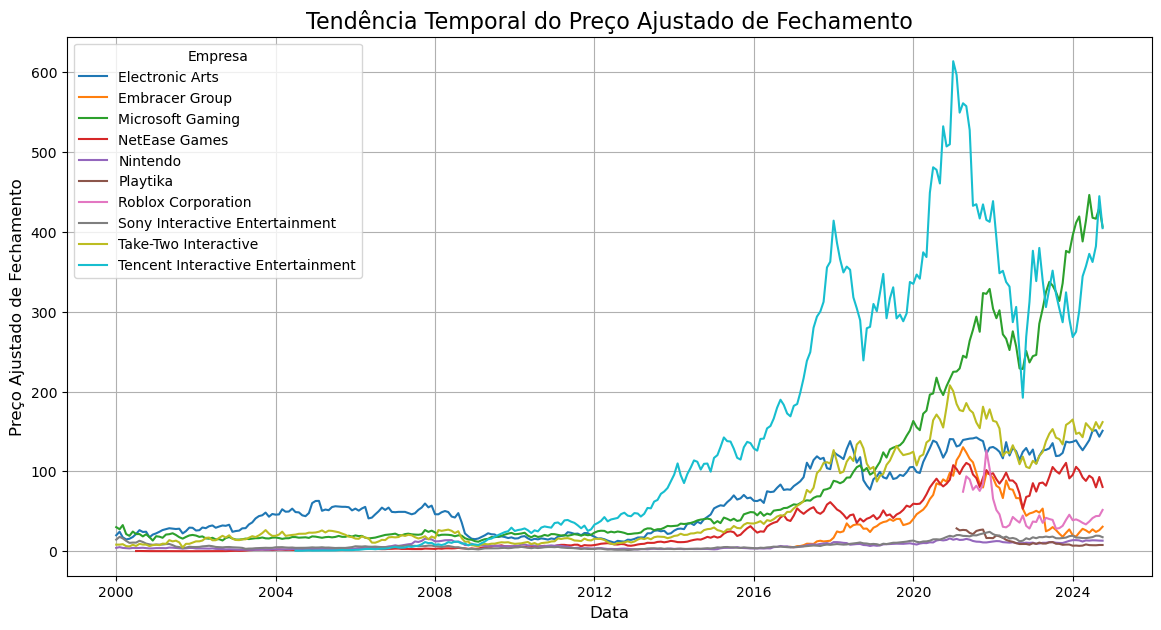

In [11]:
df['Monthly Return (%)'] = df.groupby('Company')['Adj Close'].pct_change() * 100

# Visualização das tendências de preco ajustado de fechamento
plt.figure(figsize=(14, 7))

for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Adj Close'], label=company)

plt.title('Tendência Temporal do Preço Ajustado de Fechamento', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço Ajustado de Fechamento', fontsize=12)
plt.legend(title='Empresa')
plt.grid(True)
plt.show()

### Comparacao entre empresas

In [14]:
# preço médio ajustado e volume médio por empresa
company_stats = df.groupby('Company').agg({
    'Adj Close': 'mean',
    'Volume': 'mean'
}).reset_index()

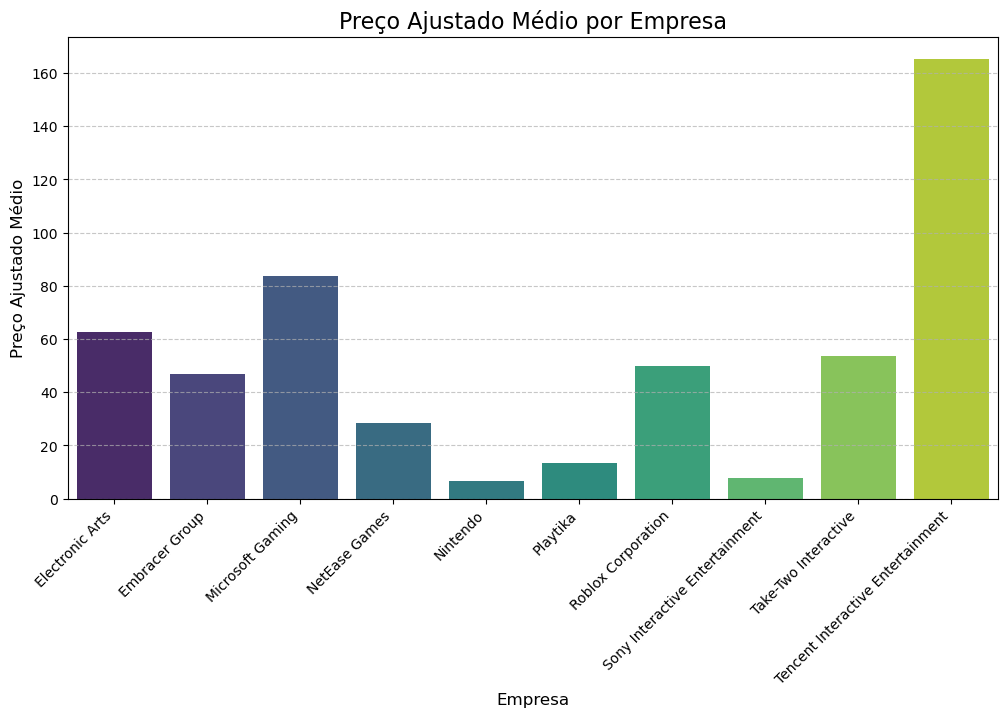

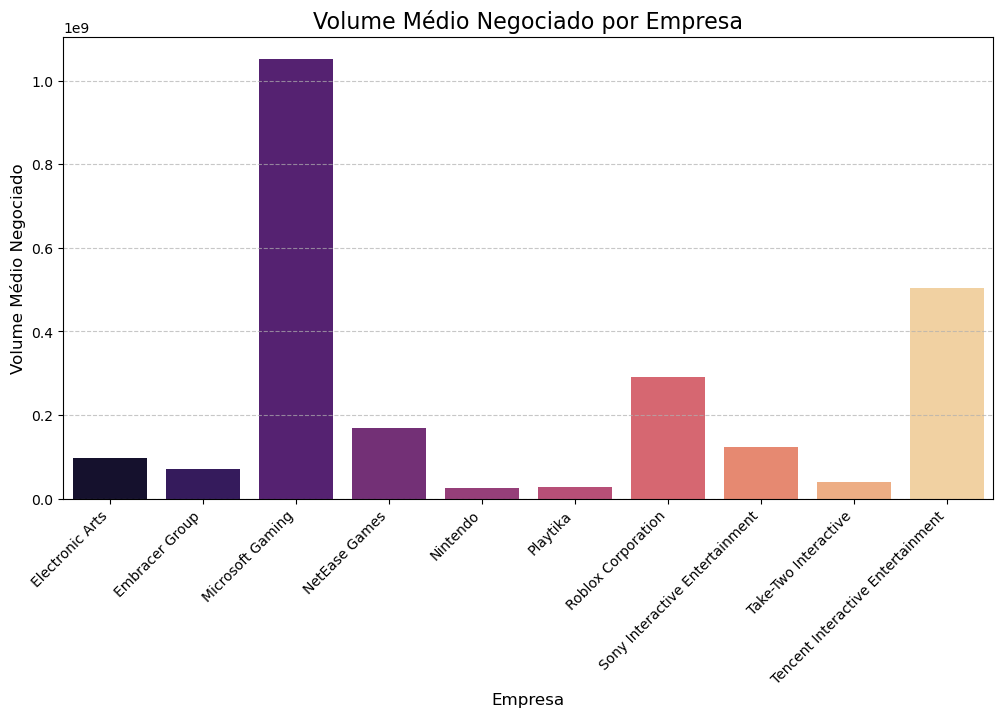

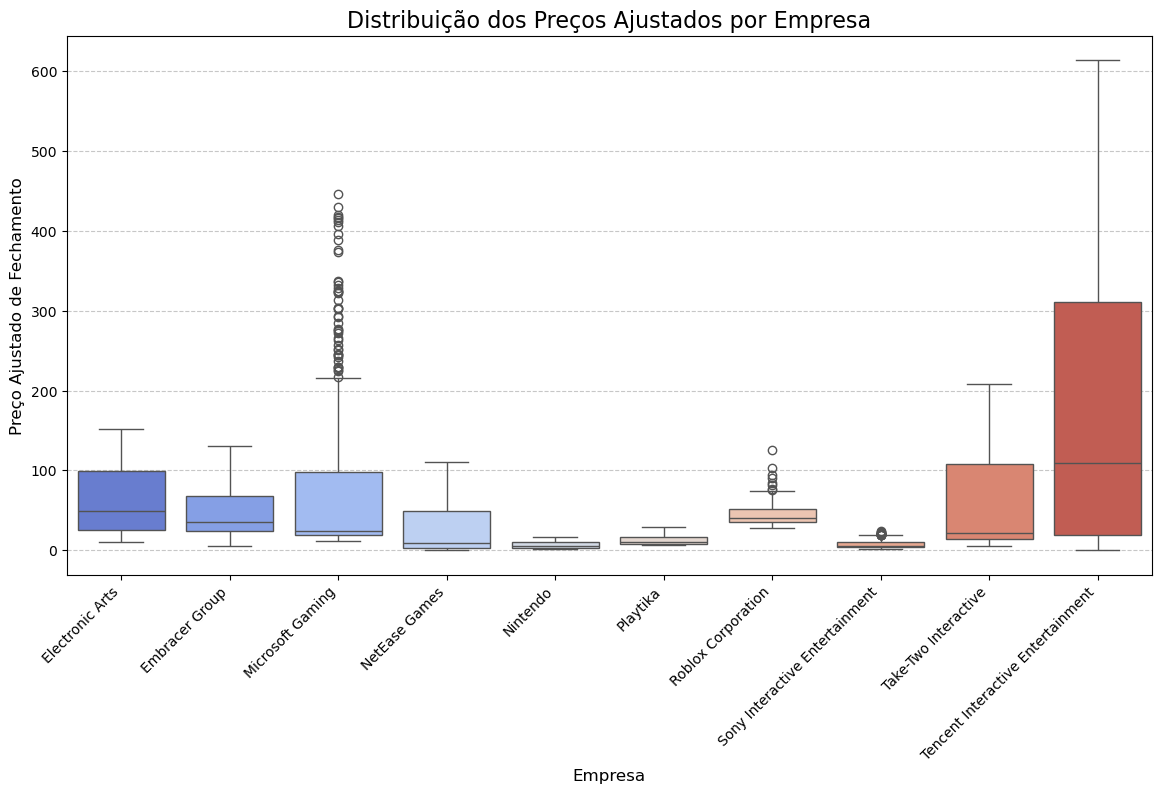

In [16]:
# Renomear colunas
company_stats.rename(columns={
    'Adj Close': 'Avg Adj Close',
    'Volume': 'Avg Volume'
}, inplace=True)

# gráficos
plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='Avg Adj Close', data=company_stats, palette='viridis')
plt.title('Preço Ajustado Médio por Empresa', fontsize=16)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Preço Ajustado Médio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='Avg Volume', data=company_stats, palette='magma')
plt.title('Volume Médio Negociado por Empresa', fontsize=16)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Volume Médio Negociado', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='Company', y='Adj Close', data=df, palette='coolwarm')
plt.title('Distribuição dos Preços Ajustados por Empresa', fontsize=16)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Preço Ajustado de Fechamento', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Volatilidade

In [17]:
# 1. Volatilidade Diária - Diferença entre o preço máximo e mínimo
df['Daily Volatility'] = df['High'] - df['Low']

# 2. Volatilidade Histórica - Desvio padrão dos preços ajustados de fechamento (30 dias)
df['Rolling Volatility (30 days)'] = df.groupby('Company')['Adj Close'].rolling(window=30).std().reset_index(0, drop=True)


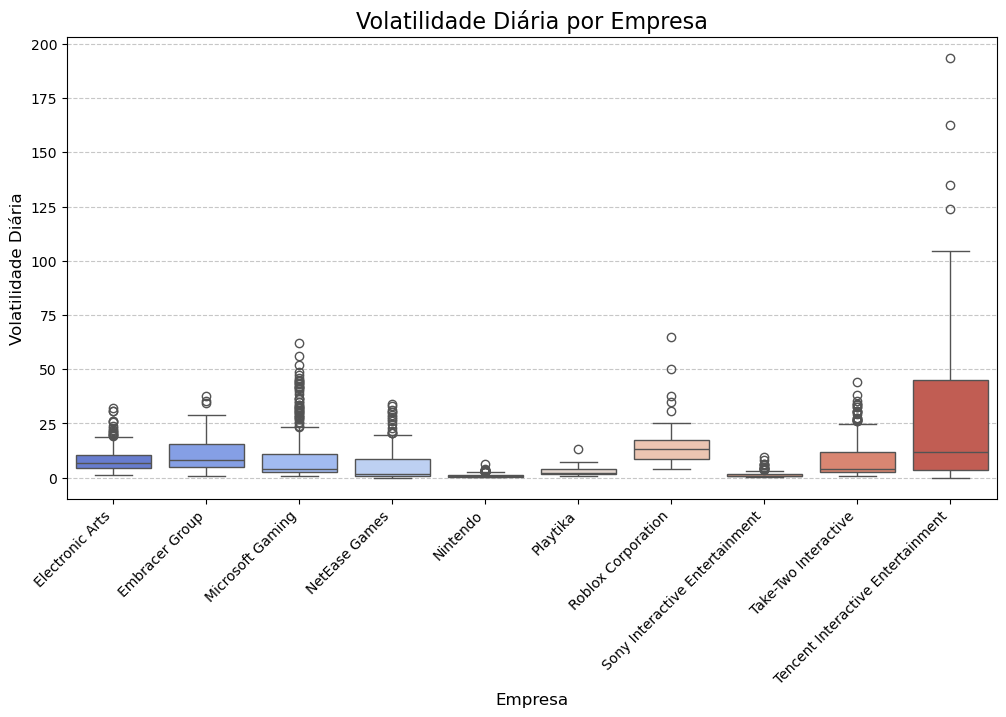

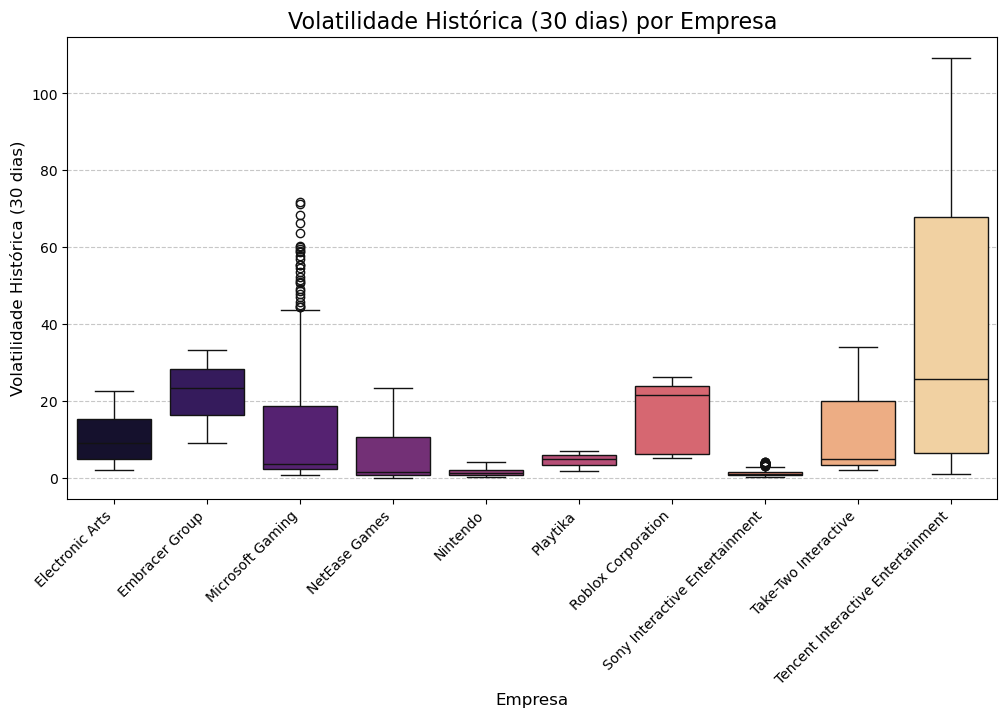

In [18]:
# Gráficos
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Daily Volatility', data=df, palette='coolwarm')
plt.title('Volatilidade Diária por Empresa', fontsize=16)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Volatilidade Diária', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Rolling Volatility (30 days)', data=df, palette='magma')
plt.title('Volatilidade Histórica (30 dias) por Empresa', fontsize=16)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Volatilidade Histórica (30 dias)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Volume médio negociado

In [19]:
company_volume_stats = df.groupby('Company').agg({
    'Volume': 'mean'
}).reset_index()


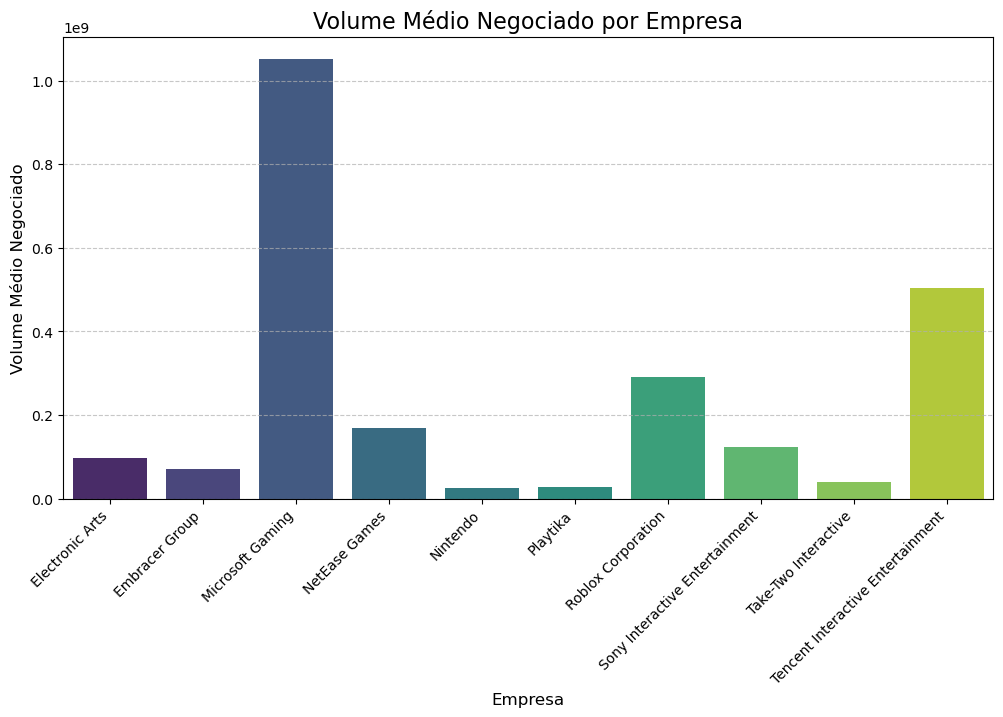

In [20]:
# Renomear a coluna
company_volume_stats.rename(columns={'Volume': 'Avg Volume'}, inplace=True)

# Volume médio negociado por empresa
plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='Avg Volume', data=company_volume_stats, palette='viridis')
plt.title('Volume Médio Negociado por Empresa', fontsize=16)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Volume Médio Negociado', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

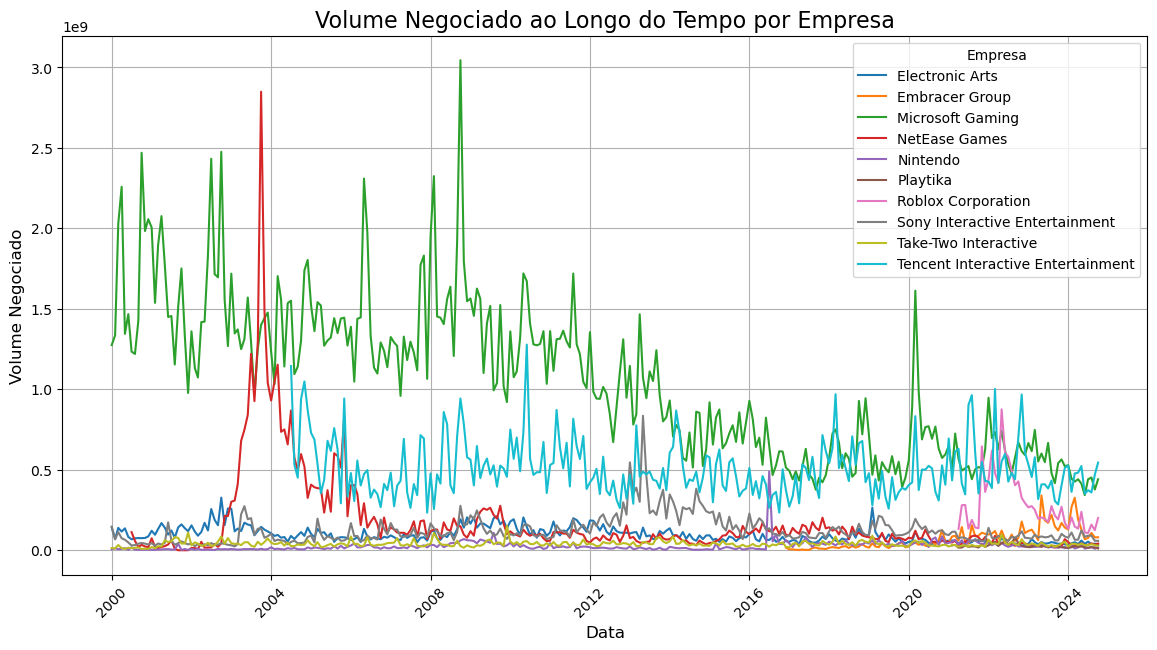

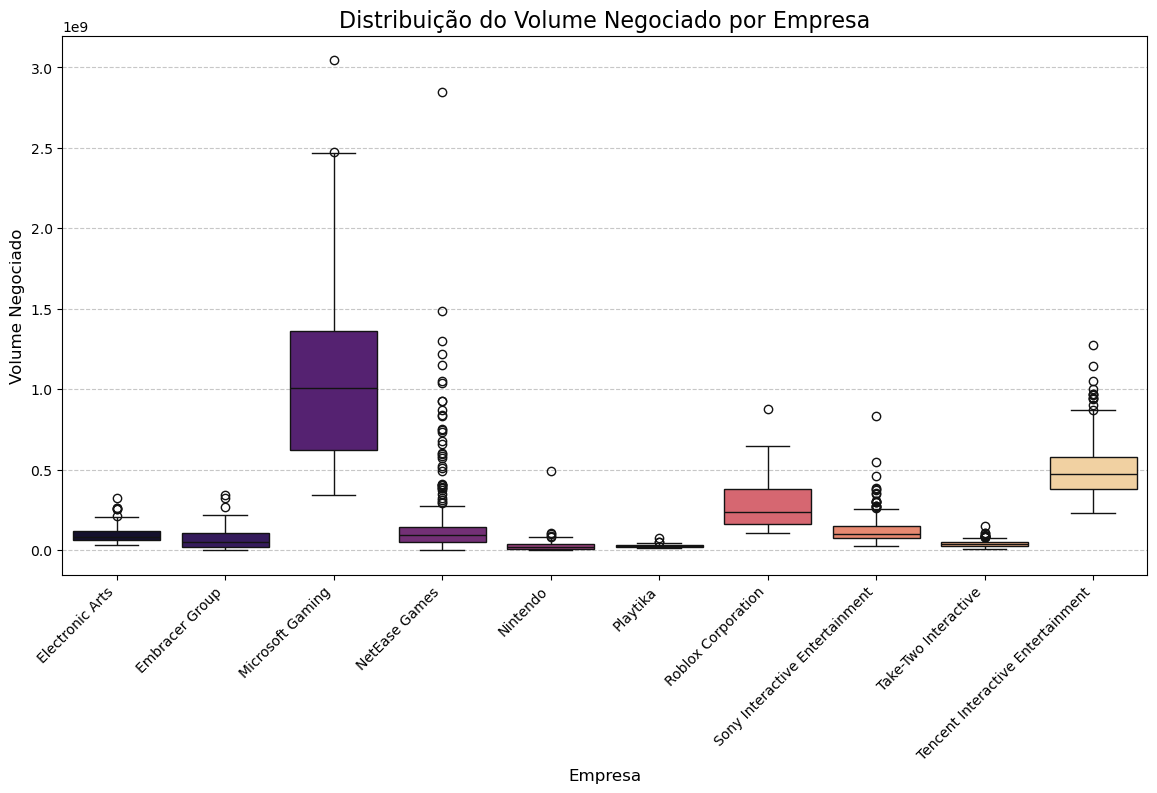

In [21]:
# Distribuicao do Volume Negociado ao Longo do Tempo (por empresa)
plt.figure(figsize=(14, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Volume'], label=company)

plt.title('Volume Negociado ao Longo do Tempo por Empresa', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Volume Negociado', fontsize=12)
plt.legend(title='Empresa')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Comparacao da Distribuicao de Volume Negociado com Boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(x='Company', y='Volume', data=df, palette='magma')
plt.title('Distribuição do Volume Negociado por Empresa', fontsize=16)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Volume Negociado', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Analise de outliers

Outliers em 'Adj Close':
           Date                            Company  Ticker Symbol  Currency  \
1650 2018-05-01                    Electronic Arts              1         3   
1651 2018-06-01                    Electronic Arts              1         3   
1675 2020-06-01                    Electronic Arts              1         3   
1676 2020-07-01                    Electronic Arts              1         3   
1677 2020-08-01                    Electronic Arts              1         3   
...         ...                                ...            ...       ...   
537  2024-06-01  Tencent Interactive Entertainment              0         0   
538  2024-07-01  Tencent Interactive Entertainment              0         0   
539  2024-08-01  Tencent Interactive Entertainment              0         0   
540  2024-09-01  Tencent Interactive Entertainment              0         0   
541  2024-10-01  Tencent Interactive Entertainment              0         0   

            Open        Hi

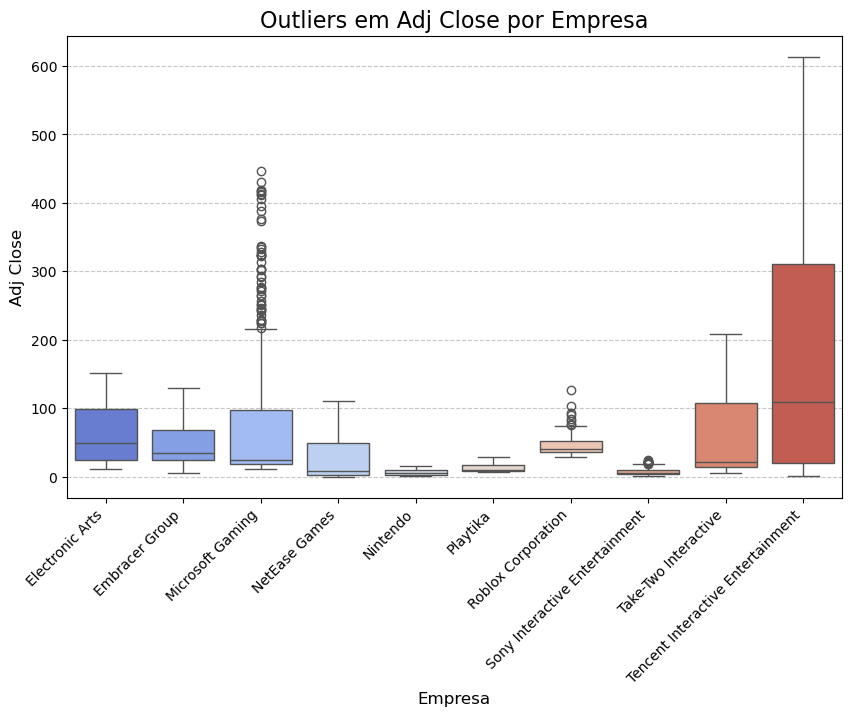

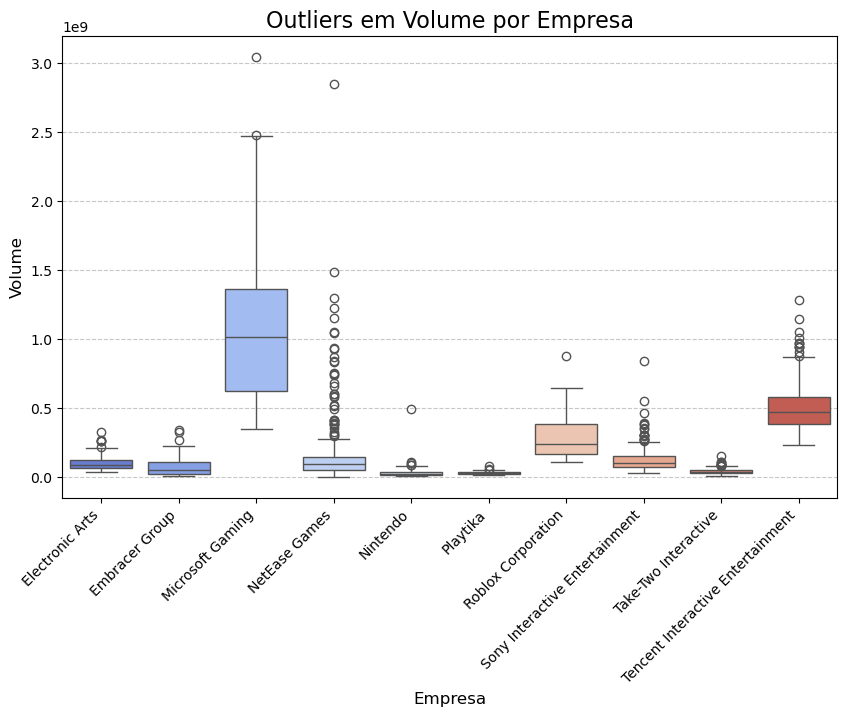

In [22]:
# Identificacao de Outliers usando IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

def plot_outliers(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Company', y=column, data=df, palette='coolwarm')
    plt.title(f'Outliers em {column} por Empresa', fontsize=16)
    plt.xlabel('Empresa', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

outliers_adj_close = identify_outliers(df, 'Adj Close')
outliers_volume = identify_outliers(df, 'Volume')

print("Outliers em 'Adj Close':")
print(outliers_adj_close)

print("\nOutliers em 'Volume':")
print(outliers_volume)

plot_outliers(df, 'Adj Close')
plot_outliers(df, 'Volume')

### Analise de retornos

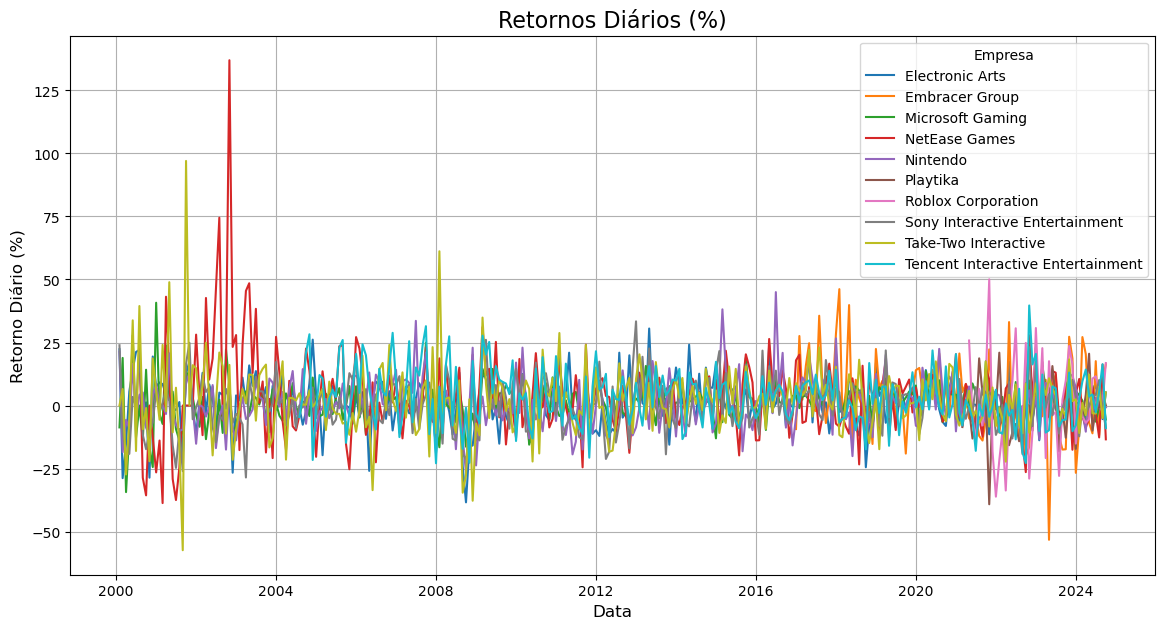

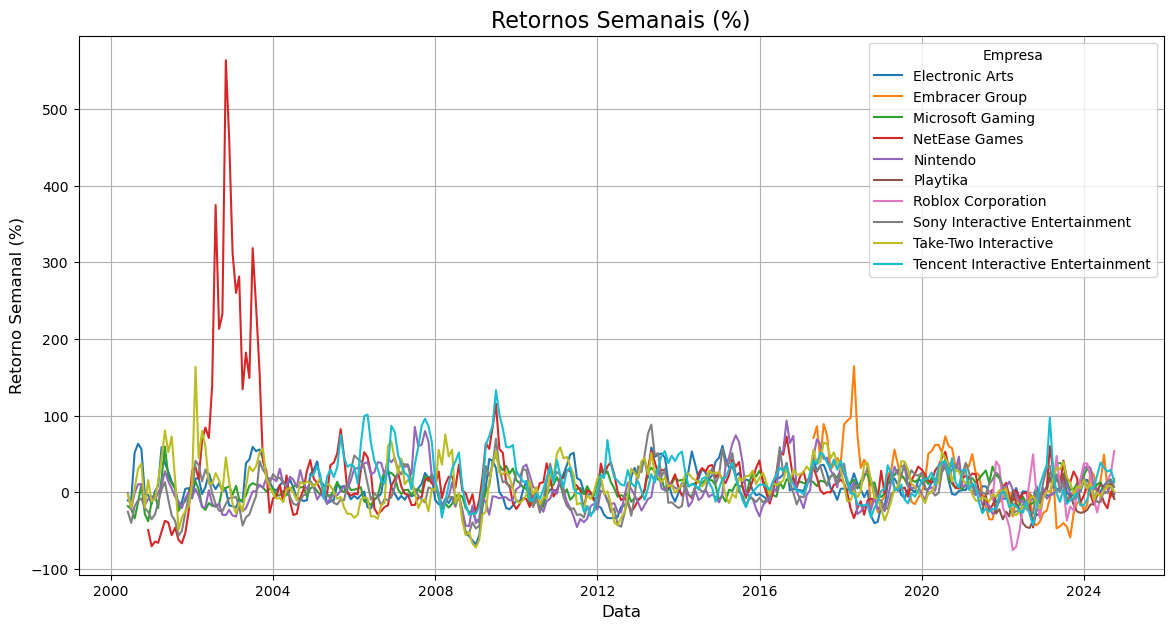

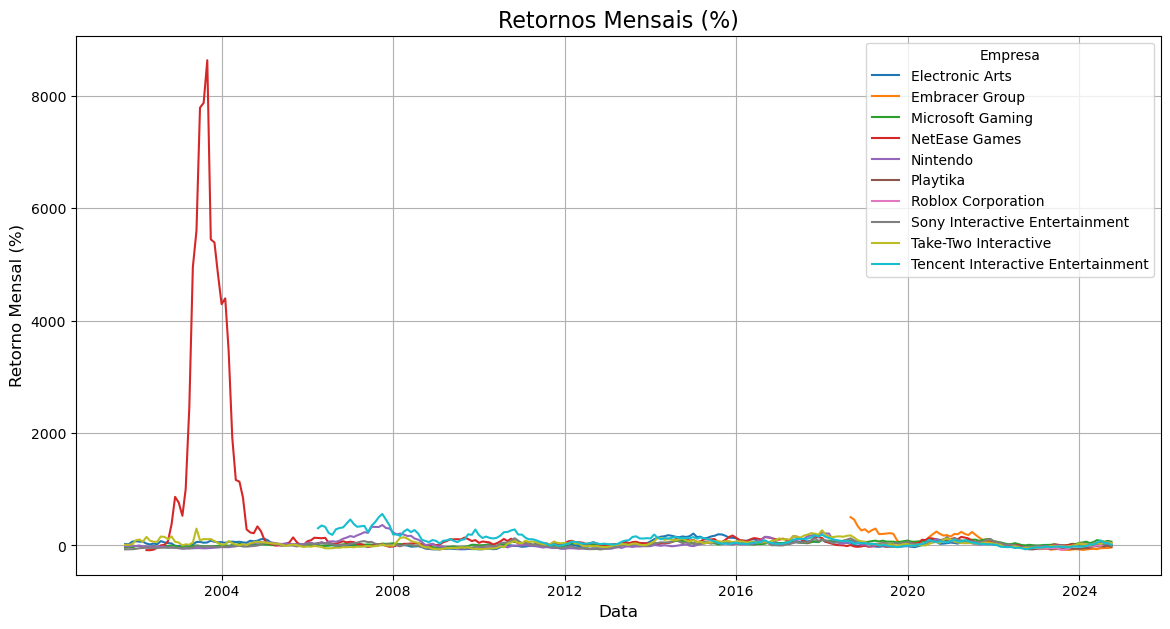

In [23]:
# Calcular Retornos Diários, Semanais e Mensais
df['Daily Return (%)'] = df.groupby('Company')['Adj Close'].pct_change() * 100
df['Weekly Return (%)'] = df.groupby('Company')['Adj Close'].pct_change(5) * 100
df['Monthly Return (%)'] = df.groupby('Company')['Adj Close'].pct_change(21) * 100

plt.figure(figsize=(14, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Daily Return (%)'], label=company)

plt.title('Retornos Diários (%)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Retorno Diário (%)', fontsize=12)
plt.legend(title='Empresa')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Weekly Return (%)'], label=company)

plt.title('Retornos Semanais (%)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Retorno Semanal (%)', fontsize=12)
plt.legend(title='Empresa')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Monthly Return (%)'], label=company)

plt.title('Retornos Mensais (%)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Retorno Mensal (%)', fontsize=12)
plt.legend(title='Empresa')
plt.grid(True)
plt.show()

### Correlacao

In [24]:
correlation_matrix = df[['Adj Close', 'Volume', 'Daily Volatility']].corr()

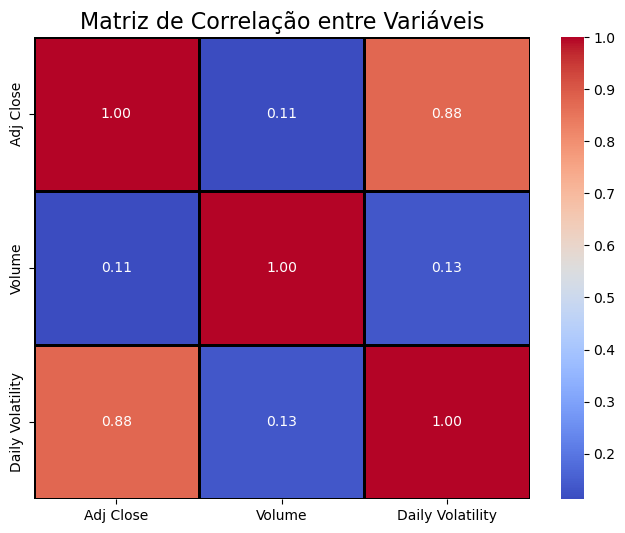

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black', cbar=True)
plt.title('Matriz de Correlação entre Variáveis', fontsize=16)
plt.show()

### Correlacao por Empresa

In [26]:
company_corr_stats = df.groupby('Company')[['Adj Close', 'Volume', 'Daily Volatility']].corr().reset_index()

In [27]:
sony_corr = company_corr_stats[company_corr_stats['Company'] == 'Sony Interactive Entertainment']
print(sony_corr)

                           Company           level_1  Adj Close    Volume  \
21  Sony Interactive Entertainment         Adj Close   1.000000 -0.327799   
22  Sony Interactive Entertainment            Volume  -0.327799  1.000000   
23  Sony Interactive Entertainment  Daily Volatility   0.568513 -0.188332   

    Daily Volatility  
21          0.568513  
22         -0.188332  
23          1.000000  


In [28]:
Tencent_corr = company_corr_stats[company_corr_stats['Company'] == 'Tencent Interactive Entertainment']
print(Tencent_corr)

                              Company           level_1  Adj Close    Volume  \
27  Tencent Interactive Entertainment         Adj Close   1.000000 -0.080901   
28  Tencent Interactive Entertainment            Volume  -0.080901  1.000000   
29  Tencent Interactive Entertainment  Daily Volatility   0.865495  0.142945   

    Daily Volatility  
27          0.865495  
28          0.142945  
29          1.000000  


In [29]:
Microsoft_corr = company_corr_stats[company_corr_stats['Company'] == 'Microsoft Gaming']
print(Microsoft_corr)

            Company           level_1  Adj Close    Volume  Daily Volatility
6  Microsoft Gaming         Adj Close   1.000000 -0.585971          0.906497
7  Microsoft Gaming            Volume  -0.585971  1.000000         -0.418664
8  Microsoft Gaming  Daily Volatility   0.906497 -0.418664          1.000000


## Implementacao de Modelo Nao Supervisionado

In [30]:
df['Daily Volatility'] = (df['High'] - df['Low']) / df['Open']

features = df[['Adj Close', 'Volume', 'Daily Volatility']]

In [31]:
# Normalizacao
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [32]:
#KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans Cluster'] = kmeans.fit_predict(scaled_features)

df.head()


,Date,Company,Ticker Symbol,Currency,Open,High,Low,Close,Adj Close,Volume,Monthly Return (%),Daily Volatility,Rolling Volatility (30 days),Daily Return (%),Weekly Return (%),KMeans Cluster
1430,2000-01-01,Electronic Arts,1,3,21.25000,28.765625,16.968750,20.437500,19.989416,140837600,NaN,0.555147,NaN,NaN,NaN,0
1431,2000-02-01,Electronic Arts,1,3,20.46875,25.562500,18.750000,25.000000,24.451891,70948000,NaN,0.332824,NaN,22.324188,NaN,0
1432,2000-03-01,Electronic Arts,1,3,23.75000,26.125000,17.062500,17.796875,17.406679,138755600,NaN,0.381579,NaN,-28.812544,NaN,0
1433,2000-04-01,Electronic Arts,1,3,18.00000,18.031250,12.671875,15.125000,14.793389,115839200,NaN,0.297743,NaN,-15.013144,NaN,0
1434,2000-05-01,Electronic Arts,1,3,15.00000,16.968750,12.250000,15.968750,15.618642,135958000,NaN,0.314583,NaN,5.578522,NaN,0


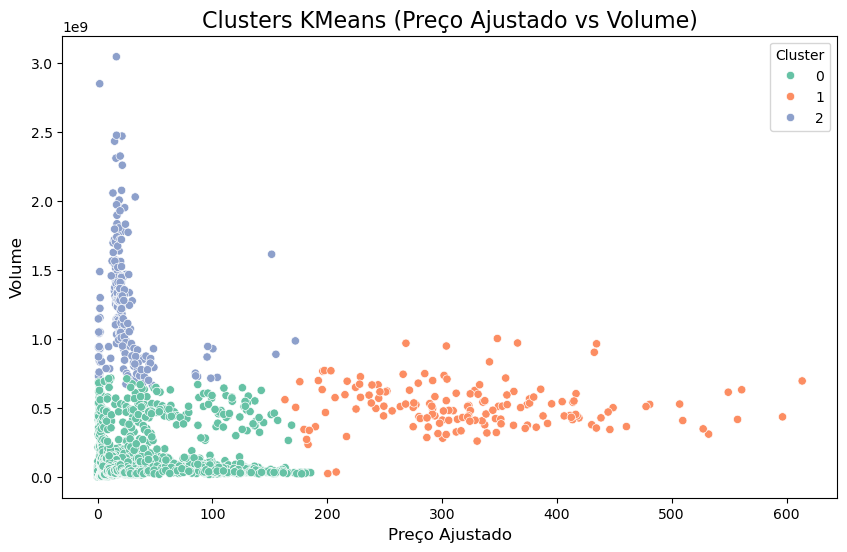

In [33]:
# Visualizando os clusters no gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adj Close', y='Volume', hue='KMeans Cluster', palette='Set2', data=df)
plt.title('Clusters KMeans (Preço Ajustado vs Volume)', fontsize=16)
plt.xlabel('Preço Ajustado', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend(title='Cluster')
plt.show()

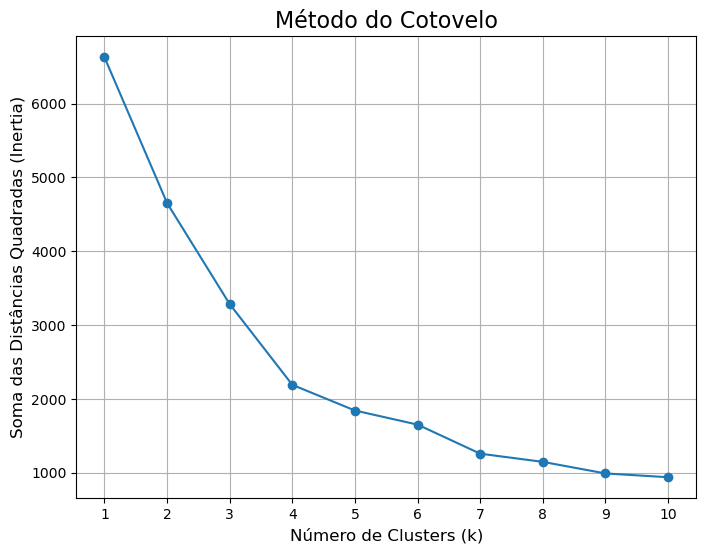

In [34]:
# Listar os valores de k de 1 até 10
inertia = []
k_range = range(1, 11)

# Calcular a soma das distancias quadradas dentro dos clusters para cada valor de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método do Cotovelo', fontsize=16)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Soma das Distâncias Quadradas (Inertia)', fontsize=12)
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [35]:
# Calcular as médias das variáveis por cluster
cluster_means = df.groupby('KMeans Cluster')[['Adj Close', 'Volume', 'Daily Volatility']].mean()
print(cluster_means)


                 Adj Close        Volume  Daily Volatility
KMeans Cluster                                            
0                34.939270  1.204955e+08          0.181031
1               325.805678  5.125003e+08          0.137770
2                24.578575  1.255536e+09          0.149652


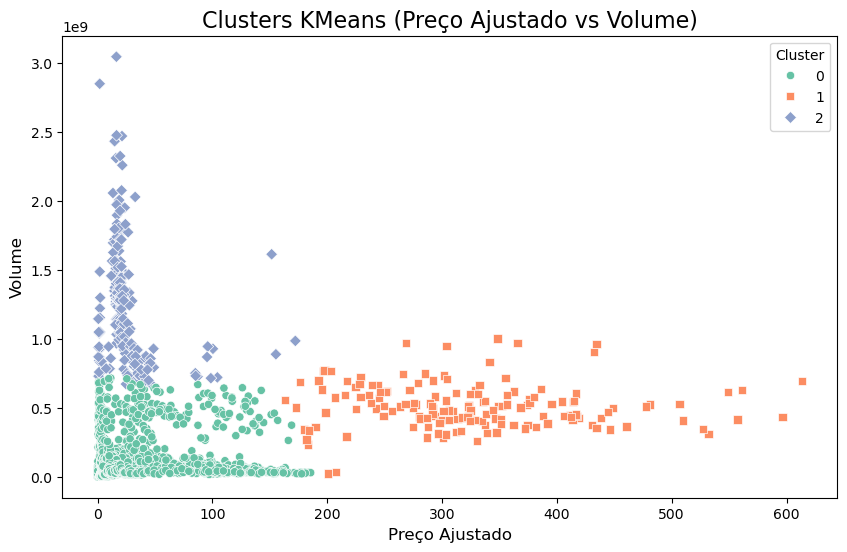

In [36]:
# Visualizar os clusters com as etiquetas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adj Close', y='Volume', hue='KMeans Cluster', palette='Set2', data=df, style='KMeans Cluster', markers=['o', 's', 'D'])
plt.title('Clusters KMeans (Preço Ajustado vs Volume)', fontsize=16)
plt.xlabel('Preço Ajustado', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend(title='Cluster', loc='upper right')
plt.show()


In [37]:
kmeans_1 = KMeans(n_clusters=4, random_state=42)
df['KMeans Cluster'] = kmeans.fit_predict(scaled_features)

df.head()

,Date,Company,Ticker Symbol,Currency,Open,High,Low,Close,Adj Close,Volume,Monthly Return (%),Daily Volatility,Rolling Volatility (30 days),Daily Return (%),Weekly Return (%),KMeans Cluster
1430,2000-01-01,Electronic Arts,1,3,21.25000,28.765625,16.968750,20.437500,19.989416,140837600,NaN,0.555147,NaN,NaN,NaN,6
1431,2000-02-01,Electronic Arts,1,3,20.46875,25.562500,18.750000,25.000000,24.451891,70948000,NaN,0.332824,NaN,22.324188,NaN,8
1432,2000-03-01,Electronic Arts,1,3,23.75000,26.125000,17.062500,17.796875,17.406679,138755600,NaN,0.381579,NaN,-28.812544,NaN,6
1433,2000-04-01,Electronic Arts,1,3,18.00000,18.031250,12.671875,15.125000,14.793389,115839200,NaN,0.297743,NaN,-15.013144,NaN,8
1434,2000-05-01,Electronic Arts,1,3,15.00000,16.968750,12.250000,15.968750,15.618642,135958000,NaN,0.314583,NaN,5.578522,NaN,8


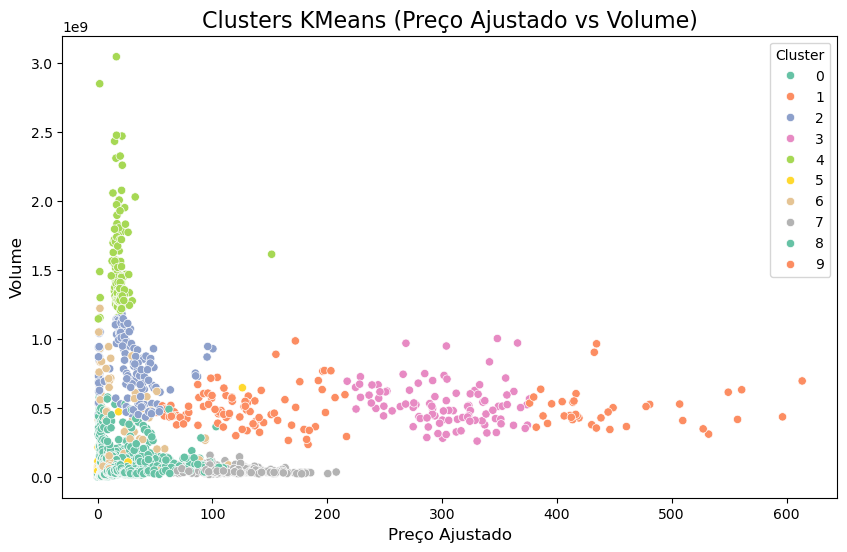

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adj Close', y='Volume', hue='KMeans Cluster', palette='Set2', data=df)
plt.title('Clusters KMeans (Preço Ajustado vs Volume)', fontsize=16)
plt.xlabel('Preço Ajustado', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend(title='Cluster')
plt.show()

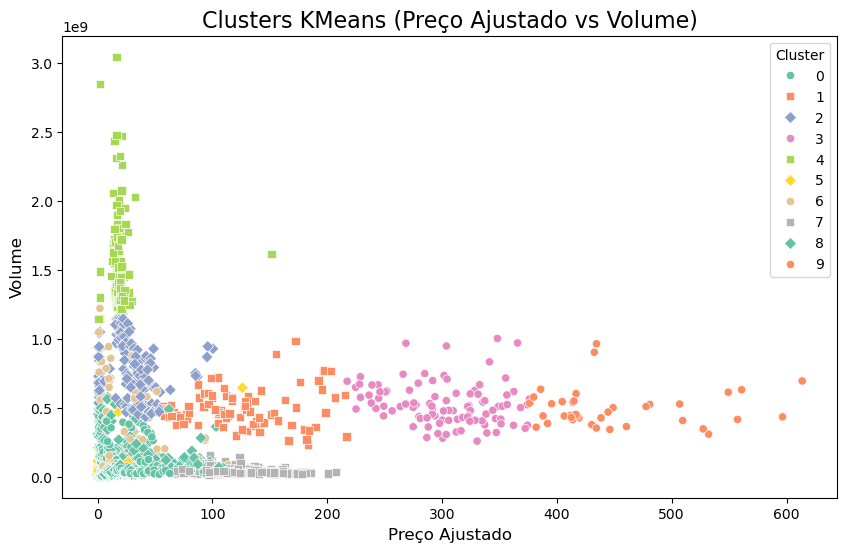

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adj Close', y='Volume', hue='KMeans Cluster', palette='Set2', data=df, style='KMeans Cluster', markers=['o', 's', 'D'])
plt.title('Clusters KMeans (Preço Ajustado vs Volume)', fontsize=16)
plt.xlabel('Preço Ajustado', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend(title='Cluster', loc='upper right')
plt.show()

### Validando o Número de Clusters com Silhouette Score

O Silhouette Score é uma métrica que mede a qualidade dos clusters formados. Ele varia entre -1 e 1, onde valores mais próximos de 1 indicam que os clusters estão bem definidos.


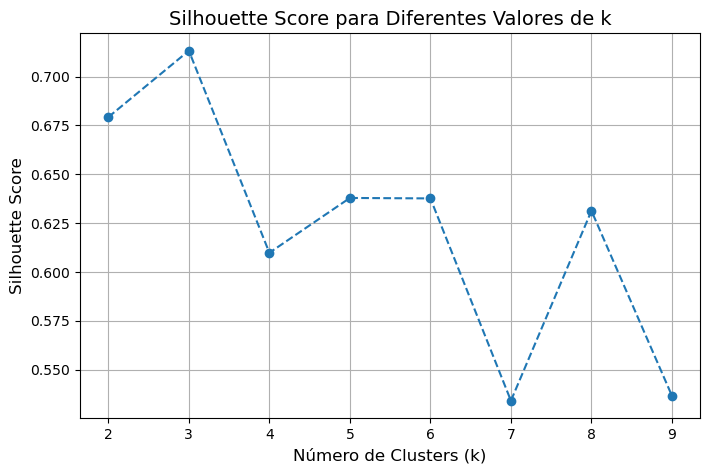

O número ideal de clusters é: 3


In [46]:
from sklearn.metrics import silhouette_score

# Calculando o Silhouette Score para diferentes números de clusters
silhouette_scores = []
k_range = range(2, 10)  # Testando de 2 a 9 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plotando o Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score para Diferentes Valores de k', fontsize=14)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True)
plt.show()

# Identificando o número de clusters com maior Silhouette Score
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"O número ideal de clusters é: {optimal_k}")

### Melhorando a Análise com DBSCAN

In [42]:
from sklearn.preprocessing import StandardScaler

# Normalizando os dados
features = ['Adj Close', 'Volume']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])


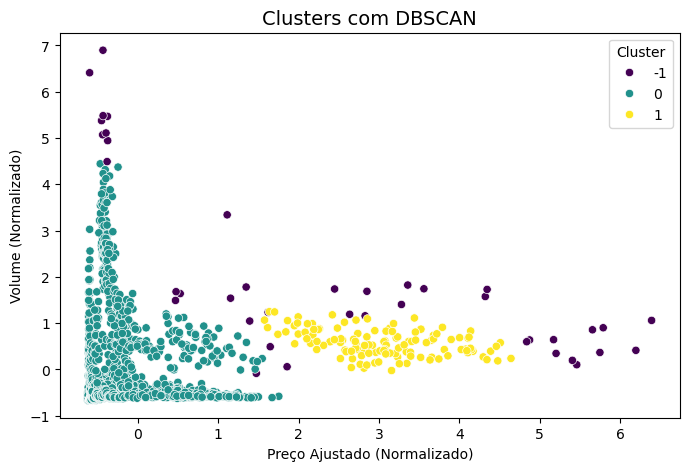

In [43]:

# Aplicando DBSCAN com visualização
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=10)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df['DBSCAN_Cluster'], palette='viridis')
plt.title('Clusters com DBSCAN', fontsize=14)
plt.xlabel('Preço Ajustado (Normalizado)')
plt.ylabel('Volume (Normalizado)')
plt.legend(title='Cluster')
plt.show()


### Expandindo a Análise de Clusterização Hierárquica

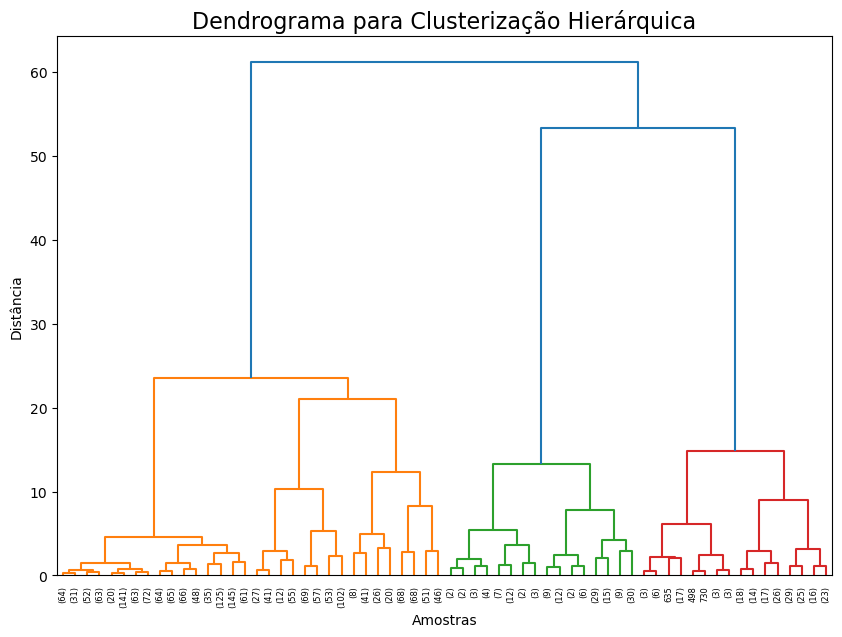

In [44]:

from scipy.cluster.hierarchy import linkage, dendrogram

# Criando o linkage e dendrograma
linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrograma para Clusterização Hierárquica', fontsize=16)
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()
